
Importing the Dependencies



In [280]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Processing

In [281]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [282]:


# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [283]:
# print last 5 rows of the dataset
heart_data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [284]:

# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [285]:

# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [286]:

# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [287]:


# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [288]:

# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [289]:


X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [290]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [291]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


standardization

Splitting the Data into Training data & Test Data

In [292]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [293]:

print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Evaluation

Accuracy Score

Gradient Boosting Machine (XGBoost)

In [294]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
# data = pd.read_csv('your_dataset.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'eval_metric': 'logloss',
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_train_pred = model.predict(dtrain)
y_test_pred = model.predict(dtest)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if x > 0.5 else 0 for x in y_train_pred]
y_test_pred_binary = [1 if x > 0.5 else 0 for x in y_test_pred]

# Evaluate accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred_binary)
test_accuracy = accuracy_score(Y_test, y_test_pred_binary)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Train Accuracy: 0.9876
Test Accuracy: 0.7705


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:59:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9876
Test Accuracy: 0.7705
Precision: 0.7879
Recall: 0.7879
F1 Score: 0.7879


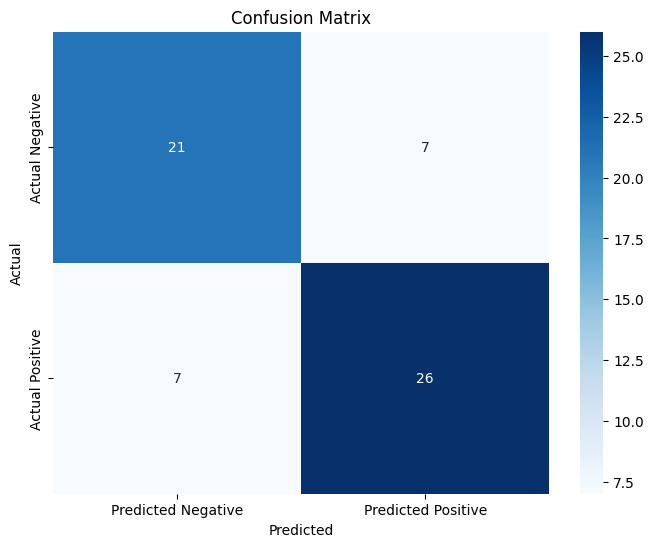

In [295]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# data = pd.read_csv('your_dataset.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split your data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
}

# Train the model
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

# Make predictions
y_train_pred = model.predict(dtrain)
y_test_pred = model.predict(dtest)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if x > 0.5 else 0 for x in y_train_pred]
y_test_pred_binary = [1 if x > 0.5 else 0 for x in y_test_pred]

# Evaluate accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred_binary)
test_accuracy = accuracy_score(Y_test, y_test_pred_binary)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_test_pred_binary)

# Calculate additional metrics
precision = precision_score(Y_test, y_test_pred_binary)
recall = recall_score(Y_test, y_test_pred_binary)
f1 = f1_score(Y_test, y_test_pred_binary)

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Gaussian Naive Bayes

In [296]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, Y_train)

# Make predictions
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Train Accuracy: 0.8471
Test Accuracy: 0.8197


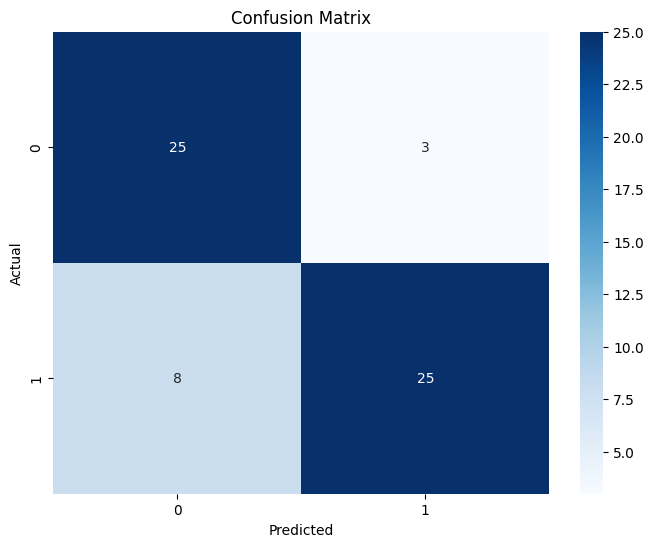

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = nb_model.predict(X_test)  # Predicted labels
y_true = Y_test

cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

LogisticRegression

In [298]:

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

# Make predictions with Logistic Regression
y_train_pred_logreg = logreg_model.predict(X_train)
y_test_pred_logreg = logreg_model.predict(X_test)

# Evaluate accuracy for Logistic Regression
train_accuracy_logreg = accuracy_score(Y_train, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(Y_test, y_test_pred_logreg)

print(f'Logistic Regression Train Accuracy: {train_accuracy_logreg:.4f}')
print(f'Logistic Regression Test Accuracy: {test_accuracy_logreg:.4f}')

Logistic Regression Train Accuracy: 0.8512
Logistic Regression Test Accuracy: 0.8197


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8197
Precision: 0.8438
Recall: 0.8182
F1 Score: 0.8308


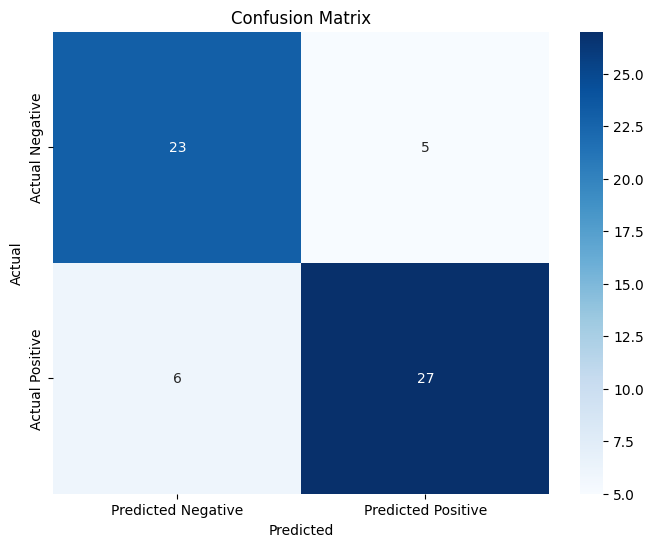

In [299]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = logreg_model.predict(X_test)  # Predicted labels
y_true = Y_test

cm = confusion_matrix(y_true, y_pred)


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the metrics

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Saving the trained model

In [300]:
import pickle

In [301]:


filename = 'heart_disease_model.sav'
pickle.dump(logreg_model, open(filename, 'wb'))

In [302]:


# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [303]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [304]:


for column in X.columns:
  print(column)


age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
